In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
data=pd.read_csv('/content/spam.csv',encoding='latin1' )
data.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
data.shape

(5572, 5)

In [10]:
data['v2'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [13]:
data['v1'].value_counts()

,count
v1,
ham,4825
spam,747


<Axes: xlabel='count', ylabel='v1'>

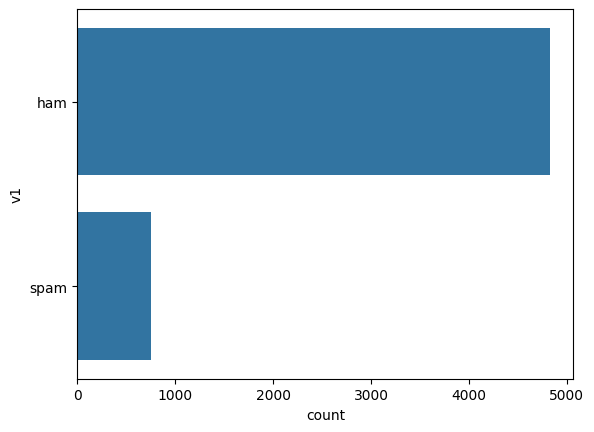

In [14]:
sns.countplot(data['v1'])

In [16]:
data.duplicated().sum()

403

In [17]:
X=data['v1'].values
Y=data['v2'].values

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [20]:
X_train.shape

(4457,)

In [21]:
X_test.shape

(1115,)

In [22]:
from sklearn.feature_extraction.text import CountVectorizer


In [23]:
cv=CountVectorizer()


In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
nb=MultinomialNB()

In [25]:
pipe=make_pipeline(cv,nb)

In [26]:
pipe.fit(X_train,Y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [27]:
y_pred=pipe.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.003587443946188341

In [29]:
email=['Hey i am Elon Musk. Get a brand new car from tesla']
pipe.predict(email)

array(["Sorry, I'll call later"], dtype='<U910')

In [30]:
import pickle
pickle.dump(pipe,open("Naive_model.pkl",'wb'))

In [31]:
from operator import mod
def predictMessage(message):
  messageVector=vectorizer.transform([messageVector])
  Prediction=mod.predict(messageVector)
  return 'v1'if prediction[0]==1 else'Ham'

In [ ]:
userMessage=input('Enter text to predict')
prediction=predictMessage(userMessage)
print('the message is:{prediction}')